# 머신러닝 LAB5 실습 
2015103920 서범진

In [ ]:
%matplotlib inline

In [31]:
import torch 
from torch.autograd import Variable 
import numpy as np 
import matplotlib.pyplot as plt

xy = np.loadtxt('diabetes.csv',delimiter=',',dtype =np.float32) # load data set 
x_data = Variable(torch.from_numpy(xy[:,0:-1])) #from the begining to before the last 
y_data = Variable(torch.from_numpy(xy[:,[-1]])) # only last col

print(x_data.data.shape) # get x_data shape
print(y_data.data.shape) # get y_data shape 

#make model 
class Model(torch.nn.Module):
    
    def __init__(self):
        
        #model initializaion before forward propagation
        
        """
        In the constructor we instantiate two nn.Linear module 
        """
        
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(8,6) 
        # input size is 8 as fixed value
        # 6 is what you can choose as output size   
        self.l2 = torch.nn.Linear(6,4) 
        # 6 which was front layer's output becomes input to l2 
        # 4 is what you can choose as output size  
        self.l3 = torch.nn.Linear(4,1) 
        # 4 which was front layer's output becomes input to l3
        # output size 1 is fixed size from data set 
        
        self.sigmoid = torch.nn.Sigmoid()
        # load sigmoid function 
        
        
    def forward(self,x):
        
        #forward propagation
        
        """
        In the forward function we accept a Variable of input data 
        and we must return a Variable of output data. We can use Modules 
        defined in the constructor as well as arbitrary operators on 
        Variables.

        """
        
        out1 = self.sigmoid(self.l1(x))
        # output which passed sigmoid function from first layer 
        out2 = self.sigmoid(self.l2(out1))
        # output which passed sigmoid function from second layer
        y_pred = self.sigmoid(self.l3(out2))
        #  y_prediction which passed sigmoid function from third layer
        
        return y_pred 
    
model = Model()


# 2) Construct our loss function and an Optimizer.

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.

criterion = torch.nn.BCELoss(size_average=True)
# Use Binary Cross Entropy as loss function 
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)
# Use Stochastic Gradient Descent for updating parameter 
# model.parameter() let function know the parameter which we need to be updated


epoch_list = []
loss_list = []


# Training loop
for epoch in range (100):
        # Forward pass: Compute predicted y by passing x to the model

    y_pred = model(x_data)
    
    # Compute and print loss 
    
    loss = criterion(y_pred,y_data)
    #put the loss value in variavble loss  
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    # for visualizaion , get values in each iteration  
    
    print(epoch,loss.data)
    # print loss data for each epoch 
    
    # Zero gradients, perform a backward pass, and update the weights.
    
    optimizer.zero_grad()
    # initilaize for each epoch
    loss.backward()
    # loss back propagation
    optimizer.step()
    # updating variables 
    

        
        




torch.Size([759, 8])
torch.Size([759, 1])
0 tensor(0.7366)
1 tensor(0.7268)
2 tensor(0.7180)
3 tensor(0.7102)
4 tensor(0.7032)
5 tensor(0.6970)
6 tensor(0.6915)
7 tensor(0.6865)
8 tensor(0.6821)
9 tensor(0.6782)
10 tensor(0.6747)
11 tensor(0.6716)
12 tensor(0.6688)
13 tensor(0.6663)
14 tensor(0.6641)
15 tensor(0.6621)
16 tensor(0.6603)
17 tensor(0.6587)
18 tensor(0.6573)
19 tensor(0.6560)
20 tensor(0.6549)
21 tensor(0.6539)
22 tensor(0.6530)
23 tensor(0.6522)
24 tensor(0.6514)
25 tensor(0.6508)
26 tensor(0.6502)
27 tensor(0.6497)
28 tensor(0.6492)
29 tensor(0.6488)
30 tensor(0.6484)
31 tensor(0.6480)
32 tensor(0.6477)
33 tensor(0.6475)
34 tensor(0.6472)
35 tensor(0.6470)
36 tensor(0.6468)
37 tensor(0.6466)
38 tensor(0.6464)
39 tensor(0.6463)
40 tensor(0.6462)
41 tensor(0.6461)
42 tensor(0.6460)
43 tensor(0.6459)
44 tensor(0.6458)
45 tensor(0.6457)
46 tensor(0.6456)
47 tensor(0.6456)
48 tensor(0.6455)
49 tensor(0.6455)
50 tensor(0.6454)
51 tensor(0.6454)
52 tensor(0.6453)
53 tensor(0.64

1) 아래의 소스코드를 실행한 다음, 각 line 별로 주석을 작성하시오. 실험 결과 (iteration vs loss)를 matplotlib 을 이용해서 plot 하시오.

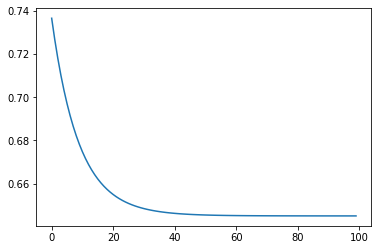

In [32]:
plt.plot(epoch_list,loss_list)
plt.show()



2) 이 소스코드에서 사용하는 activation function 은 무엇인가. Pytorch 에서 제공하는 activation function 의 종류를 조사하고, diabetes data 에 대해 좋은 성능을 내는 activation function 을 찾으시오. 

위에서 사용한 activation function은 sigmoid 활성함수를 사용하였다.

Pytorch에서는 nn.ELU, nn.CELU, nn.SELU, nn.GLU, nn.Hardshrink, nn.Hardtanh, nn.LeakyReLU, nn.PReLU, nn.ReLU, nn.ReLU6, nn.RReLU, nn.Sigmoid, nn.LogSigmoid, nn.Softplus, nn.Softshrink, nn.Softsign, nn.Tanh, nn.Tanhshrink, nn.Threshold, nn.Softmin ,nn.Softmax, nn.Softmax2d, nn.LogSoftmax 등의 활성함수를 제공하고 있다. 

이 문제에서는 BCE objective function을 사용하고 있는데 BCECriterion로 들어가는 입력이 0에서 1사이여야 한다. 한편, ReLU와 같은 활성함수를 사용하면 그 범위를 넘어가 사용할 수 없는 조건이 있었다. 
한편, Softplus를 수행시켜 보니, 처음의 iteration에서는 sigmoid보다 조금 더 큰 결과를 나타내는 경향이 있지만 sigmoid에 비해 더 빠르게 목적함수가 0에 최소값에 수렴하는 것을 확인할 수 있다. 

+) 마지막에 y_pred 이전에 sigmoid로 범위만 설정해서 BCELoss 의 입력 범위가 0에서 1 사이가 되도록 한다. 

In [7]:
import torch 
from torch.autograd import Variable 
import numpy as np 
import matplotlib.pyplot as plt

xy = np.loadtxt('diabetes.csv',delimiter=',',dtype =np.float32) # load data set 
x_data = Variable(torch.from_numpy(xy[:,0:-1])) #from the begining to before the last 
y_data = Variable(torch.from_numpy(xy[:,[-1]])) # only last col

print(x_data.data.shape) # get x_data shape
print(y_data.data.shape) # get y_data shape 

#make model 
class Model(torch.nn.Module):
    
    def __init__(self):
        
        #model initializaion before forward propagation
        
        """
        In the constructor we instantiate two nn.Linear module 
        """
        
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(8,6) 
        # input size is 8 as fixed value
        # 6 is what you can choose as output size   
        self.l2 = torch.nn.Linear(6,4) 
        # 6 which was front layer's output becomes input to l2 
        # 4 is what you can choose as output size  
        self.l3 = torch.nn.Linear(4,1) 
        # 4 which was front layer's output becomes input to l3
        # output size 1 is fixed size from data set 
        
        self.sigmoid = torch.nn.Sigmoid()
        self.active = torch.nn.ReLU()
        # load sigmoid function 
        
        
    def forward(self,x):
        
        #forward propagation
        
        """
        In the forward function we accept a Variable of input data 
        and we must return a Variable of output data. We can use Modules 
        defined in the constructor as well as arbitrary operators on 
        Variables.

        """
        
        out1 = self.active(self.l1(x))
        # output which passed sigmoid function from first layer 
        out2 = self.active(self.l2(out1))
        # output which passed sigmoid function from second layer
        y_pred = self.sigmoid(self.l3(out2))
        #  y_prediction which passed sigmoid function from third layer
        
        return y_pred 
    
model = Model()


# Construct our loss function and an Optimizer.

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.

criterion = torch.nn.BCELoss(size_average=True)
# Use Binary Cross Entropy as loss function 
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)
# Use Stochastic Gradient Descent for updating parameter 
# model.parameter() let function know the parameter which we need to be updated


epoch_list = []
loss_list = []


# Training loop
for epoch in range (100):
        # Forward pass: Compute predicted y by passing x to the model

    y_pred = model(x_data)
    
    # Compute and print loss 
    
    loss = criterion(y_pred,y_data)
    #put the loss value in variavble loss  
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    # for visualizaion , get values in each iteration  
    
    print(epoch,loss.data)
    # print loss data for each epoch 
    
    # Zero gradients, perform a backward pass, and update the weights.
    
    optimizer.zero_grad()
    # initilaize for each epoch
    loss.backward()
    # loss back propagation
    optimizer.step()
    # updating variables 
    


torch.Size([759, 8])
torch.Size([759, 1])
0 tensor(0.6753)
1 tensor(0.6739)
2 tensor(0.6725)
3 tensor(0.6712)
4 tensor(0.6700)
5 tensor(0.6688)
6 tensor(0.6676)
7 tensor(0.6666)
8 tensor(0.6656)
9 tensor(0.6646)
10 tensor(0.6637)
11 tensor(0.6628)
12 tensor(0.6620)
13 tensor(0.6612)
14 tensor(0.6604)
15 tensor(0.6597)
16 tensor(0.6590)
17 tensor(0.6584)
18 tensor(0.6577)
19 tensor(0.6571)
20 tensor(0.6566)
21 tensor(0.6561)
22 tensor(0.6556)
23 tensor(0.6551)
24 tensor(0.6546)
25 tensor(0.6542)
26 tensor(0.6538)
27 tensor(0.6534)
28 tensor(0.6530)
29 tensor(0.6526)
30 tensor(0.6523)
31 tensor(0.6519)
32 tensor(0.6516)
33 tensor(0.6513)
34 tensor(0.6511)
35 tensor(0.6508)
36 tensor(0.6505)
37 tensor(0.6503)
38 tensor(0.6501)
39 tensor(0.6498)
40 tensor(0.6496)
41 tensor(0.6494)
42 tensor(0.6492)
43 tensor(0.6491)
44 tensor(0.6489)
45 tensor(0.6487)
46 tensor(0.6486)
47 tensor(0.6484)
48 tensor(0.6483)
49 tensor(0.6481)
50 tensor(0.6480)
51 tensor(0.6479)
52 tensor(0.6477)
53 tensor(0.64

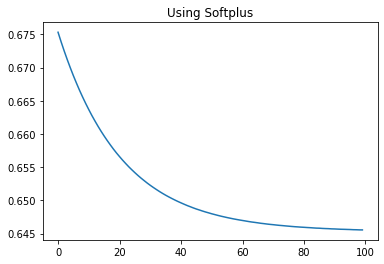

In [8]:
plt.plot(epoch_list,loss_list)
plt.title('Using Softplus')
plt.show()

3) 이 실험에서 training, test dataset 이 적절히 구분되어 있는가. 만약 그렇지 않다면 어떤 문제가 발생하는지 설명하고, 이를 해결하기 위한 방법을 제시하시오.

이 실험에서는 training dataset 과 test dataset이 따로 구분되어 있지 않다. 또한 이 실험에서는 현재 모델을 training만 시킬 뿐, test시키는 작업은 수행하지 않고 있다. traing dataset과 test dataset이 구분되어 있지 않으면 모델의 성능을 정확하게 확인할 수 없다. training시킨 data를 가지고 test를 수행한다면 당연히 모델의 성능이 좋게 나올 수 밖에 없다. test dataset에서는 training dataset에 포함되지 않거나 전체 dataset에서 랜덤 추출한 data를 통해 test를 시키는 것이 알맞다.   